**Decision Tree**

Decision tree is a supervised learning algorithm that works for both categorical and continuous input and output variables that is we can predict both categorical variables (classification tree) and a continuous variable (regression tree). It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In this assignment, we delve into the application of decision tree algorithms for the analysis of the obesity dataset. This dataset, which includes parameters like age, gender, height, weight and BMI, offers a comprehensive look into the variables that contribute to obesity. By employing a decision tree, we aim to identify key determinants and patterns that differentiate individuals based on their weight categories (ie, Normal Weight, Overweight, Obese or Underweight).

In [61]:
# Import the necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [93]:
# Load the dataset
data=pd.read_csv("Obesity_Classification.csv")
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


**Perform some basic EDA**

In [94]:
# Check null value
data.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [95]:
# Check duplicate data
data.duplicated().sum()

0

In [96]:
# Shape of dataset
data.shape

(108, 7)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [99]:
# Drop column 'ID'
df=data.drop("ID", axis=1)
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


**Label encoding**

In [100]:
# As columns "Gender" and "Label" contains objects; therefore, we used label encoder to label the data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [101]:
# Label encoding of column "Gender" and "Label"
df["Gender"] = le.fit_transform(df["Gender"])
df["Label"] = le.fit_transform(df["Label"])
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


In [102]:
# Define X and Y
x = df.drop('Label', axis = 1)
y = df['Label']

In [103]:
# Performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [104]:
# Creating the model
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [105]:
# Making the predictions
y_pred = clf.predict(x_test)

In [106]:
# Evaluating the model
# to test performance of the model we use the following scores
Accuracy = np.round(metrics.accuracy_score(y_test, y_pred),2)
Precision = np.round(metrics.precision_score(y_test, y_pred, average = 'micro'), 2)
Recall = np.round(metrics.recall_score(y_test, y_pred, average = 'micro' ), 2)
F1_Score = np.round(metrics.f1_score(y_test, y_pred, average = 'micro'), 2)

In [107]:
print(Accuracy)
print(Precision)
print(Recall)
print(F1_Score)

0.95
0.95
0.95
0.95


[Text(0.3333333333333333, 0.9, 'x[4] <= 20.6\ngini = 0.68\nsamples = 86\nvalue = [20, 9, 17, 40]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]'),
 Text(0.5, 0.7, 'x[4] <= 24.6\ngini = 0.636\nsamples = 46\nvalue = [20, 9, 17, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 97.5\ngini = 0.523\nsamples = 28\nvalue = [2, 9, 17, 0]'),
 Text(0.5, 0.3, 'x[0] <= 28.5\ngini = 0.188\nsamples = 19\nvalue = [2, 0, 17, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]')]

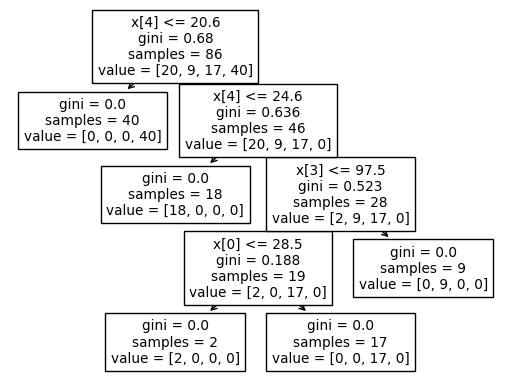

In [108]:
# Plot the tree
tree.plot_tree(clf)

**Hyperparameter Tuning and Model Optimization**

We used GridSearchCV for hyperparameter tuning

In [109]:
# Creating parameter dictionary
params = {'max_leaf_nodes': list(range(2, 10)),
         'criterion': ['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'min_samples_split': [2, 3, 4, 5],
         'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]}

In [110]:
# Importing liberaries
from sklearn.model_selection import GridSearchCV

In [111]:
# Optimizing the algorithm
grid_search = GridSearchCV(clf, params, cv=5, verbose=1) # 'cv' stands for cross-validation. It splits our dataset into groups, holding one group as the test, and remaining as training.
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [112]:
# Getting the best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.0001, 'min_samples_split': 3, 'splitter': 'best'}


In [113]:
# Print the best accuracy
print('Best accuracy:', grid_search.best_score_)

Best accuracy: 0.977124183006536


In [114]:
# Use the best parameters to creat an optimal model
clf_opt = DecisionTreeClassifier(criterion='gini',
                                 max_leaf_nodes= 4,
                                 min_impurity_decrease= 0.0001,
                                 min_samples_split= 3,
                                splitter='best')
clf_opt.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, min_impurity_decrease=0.0001,
                       min_samples_split=3)

In [115]:
# taking the predctions from optimal model
y_pred_opt = clf_opt.predict(x_test)

In [116]:
# Evaluating the optimal model
Accuracy_opt = np.round(metrics.accuracy_score(y_test, y_pred_opt),2)
Precision_opt = np.round(metrics.precision_score(y_test, y_pred_opt, average = 'micro'), 2)
Recall_opt = np.round(metrics.recall_score(y_test, y_pred_opt, average = 'micro' ), 2)
F1_Score_opt = np.round(metrics.f1_score(y_test, y_pred_opt, average = 'micro'), 2)

In [117]:
print(Accuracy_opt)
print(Precision_opt)
print(Recall_opt)
print(F1_Score_opt)

0.95
0.95
0.95
0.95


[Text(0.3333333333333333, 0.875, 'x[3] <= 52.5\ngini = 0.68\nsamples = 86\nvalue = [20, 9, 17, 40]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]'),
 Text(0.5, 0.625, 'x[4] <= 24.6\ngini = 0.636\nsamples = 46\nvalue = [20, 9, 17, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'x[3] <= 97.5\ngini = 0.523\nsamples = 28\nvalue = [2, 9, 17, 0]'),
 Text(0.5, 0.125, 'gini = 0.188\nsamples = 19\nvalue = [2, 0, 17, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]')]

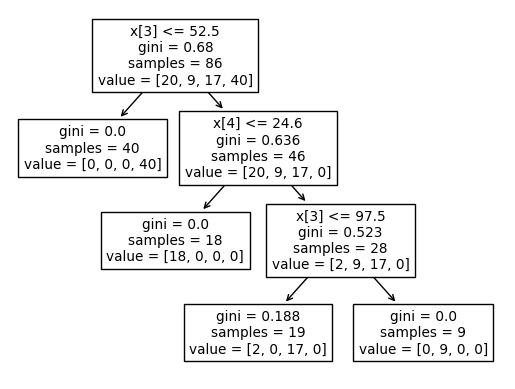

In [118]:
# Plot the new tree
tree.plot_tree(clf_opt)